In [1]:
from dataset import CoverDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from models import get_models
import albumentations as A
import torch
from defs import *
from torchvision.utils import make_grid

/root/anaconda3/envs/album/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
print(optimizer.param_groups[0]['lr'])

Sequential(
  (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
)

In [51]:
from diffusers.optimization import get_cosine_schedule_with_warmup
import torch

model = torch.nn.Sequential(torch.nn.Conv2d(3,3,3))
optimizer = torch.optim.AdamW(model.parameters(), lr=0.00009)

lr_scheduler = get_cosine_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=int(3585 * 0.01),
    num_training_steps=(3585 * 10),)

In [52]:
import matplotlib.pyplot as plt

In [53]:
lrs = []
for i in range(50):
    for j in range(3585):
        lrs.append(optimizer.param_groups[0]['lr'])
        lr_scheduler.step()

In [59]:
lrs[8*3585]

8.610483166959777e-06

[]

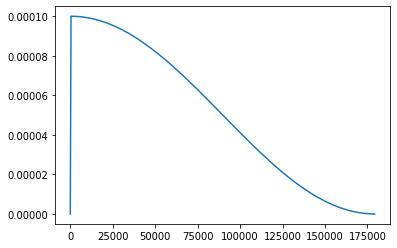

In [40]:
plt.plot(list(range(50*3585)), lrs)
plt.plot()

In [5]:
dataset = CoverDataset(DATA_PATH, IMSIZE, None, True, False)
train_dataloader = DataLoader(
    dataset, batch_size=64, shuffle=True, drop_last=True
)

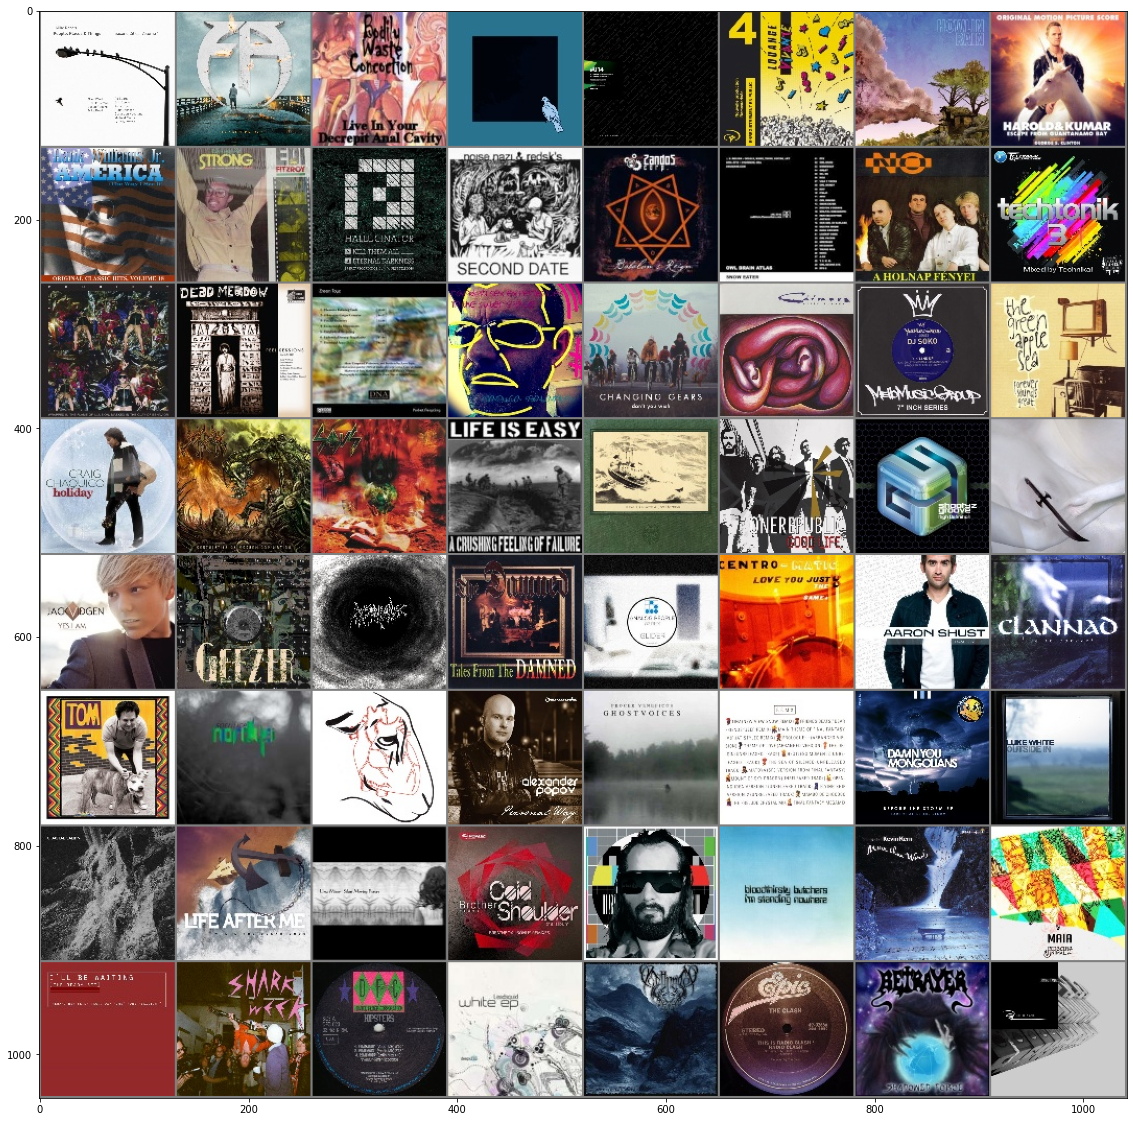

In [6]:
a = next(iter(train_dataloader))
plt.figure(figsize=(20,20))
plt.imshow((make_grid(a, 8).permute(1,2,0)+1)/2)

In [2]:
from diffusers import DDPMScheduler, DDPMPipeline
from evaluate import evaluate
DEVICE = 'cuda:2'
model = get_models(IMSIZE).to(DEVICE)

In [13]:
model = model.from_pretrained('results/weights/unet')
model = model.to(DEVICE)
model.train()
noise_scheduler = DDPMScheduler(num_train_timesteps=NUM_TRAIN_TIMESTEPS)

In [14]:
EVAL_BATCH_SIZE = 36
pipeline = DDPMPipeline(unet=model, scheduler=noise_scheduler)
evaluate(1000000, pipeline, size = 64)


  1%|          | 9/1000 [00:06<11:54,  1.39it/s]


KeyboardInterrupt: 

In [15]:
model.training

True

In [17]:
pipeline.unet.training

True